In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import optuna

from sklearn.linear_model import LinearRegression

/home/viktor/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open('config.yaml','r') as file_object:
    config = yaml.load(file_object,Loader=yaml.SafeLoader)

In [3]:
study_dir = 'studies'
studies = os.listdir(study_dir)

study_names = [study.split('.')[0] for study in studies]
storages = ['sqlite:///'+'studies/'+study for study in studies]

In [4]:
studies = [optuna.load_study(study_name=study, storage=storage) for study, storage in zip(study_names, storages)]

### Best Trial

In [5]:
for model, study in enumerate(studies):
    print('Best trial of', study_names[model])
    trial = study.best_trial

    print(f'  MAE: {trial.value}')
    print('  Params: ')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
    print()

Best trial of pv_lstm
  MAE: 0.04537281463431517
  Params: 
    batch_size: 193
    local_epochs: 27
    n_rounds: 10
    n_layers: 1
    lr: 0.0001482962282055971
    units: 65

Best trial of pv_bilstm
  MAE: 0.04201497212271588
  Params: 
    batch_size: 109
    local_epochs: 50
    n_rounds: 6
    n_layers: 2
    lr: 0.025479622636967982
    units: 48

Best trial of w_fnn
  MAE: 0.08981650669052688
  Params: 
    batch_size: 36
    local_epochs: 39
    n_rounds: 8
    n_layers: 2
    lr: 2.441852593294608e-05
    units: 241

Best trial of pv_fnn
  MAE: 0.04228123865664756
  Params: 
    batch_size: 241
    local_epochs: 37
    n_rounds: 8
    n_layers: 1
    lr: 3.1361891018576216e-05
    units: 234

Best trial of w_bilstm
  MAE: 0.08769764741927989
  Params: 
    batch_size: 116
    local_epochs: 19
    n_rounds: 6
    n_layers: 2
    lr: 0.00323617929595032
    units: 46

Best trial of w_tcn
  MAE: 0.08726352194395366
  Params: 
    batch_size: 73
    local_epochs: 23
    n_rounds

In [6]:
def ten_best(study):
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)
    print("Top 10 Trials:", '\n')
    for trial in sorted_trials[:10]:
        print(f"Trial {trial.number}: MAE = {trial.value}")
        print(f"  Params: {trial.params}")
        print()

HPO Progess of model: pv_lstm
Improvement per Trial: 0.00014157555500435772


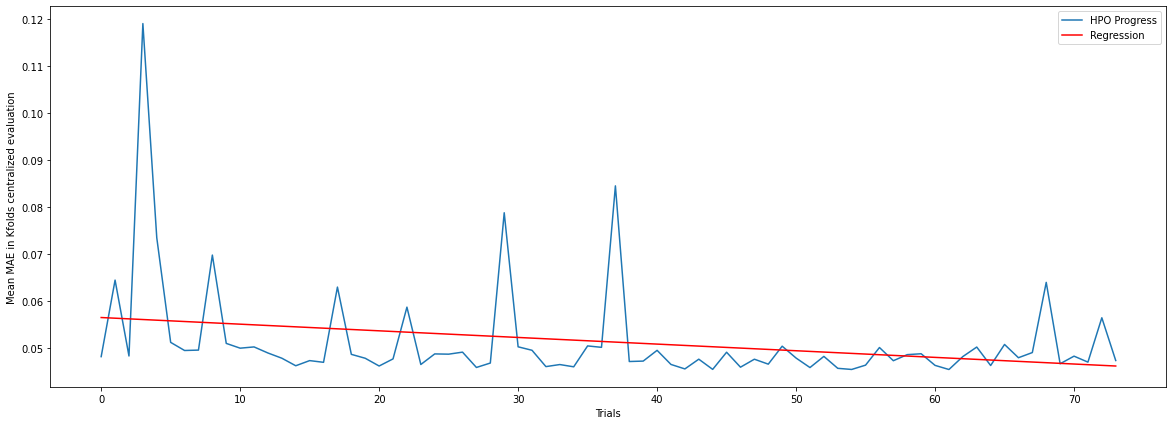

HPO Progess of model: pv_bilstm
Improvement per Trial: 6.603264103936012e-05


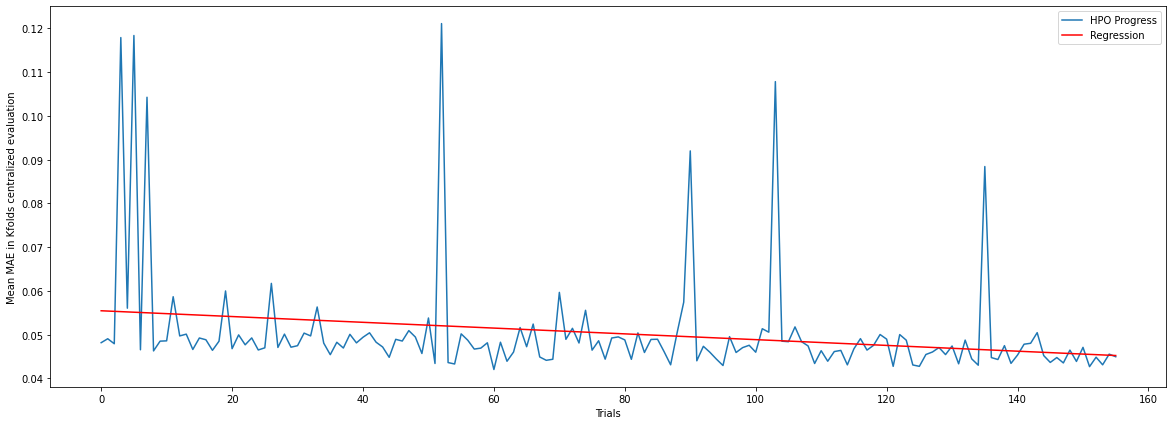

HPO Progess of model: w_fnn
Improvement per Trial: 2.461112090048561e-06


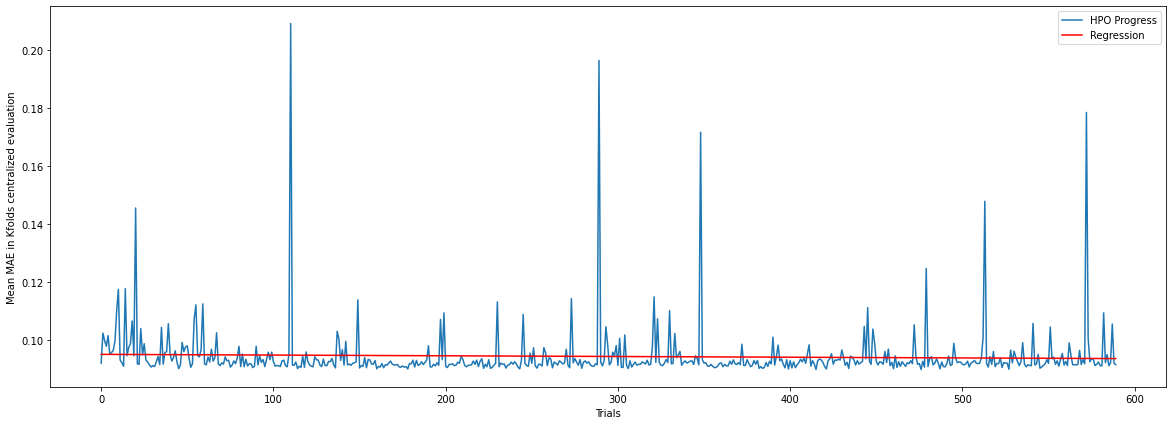

HPO Progess of model: pv_fnn
Improvement per Trial: 1.794771772115491e-05


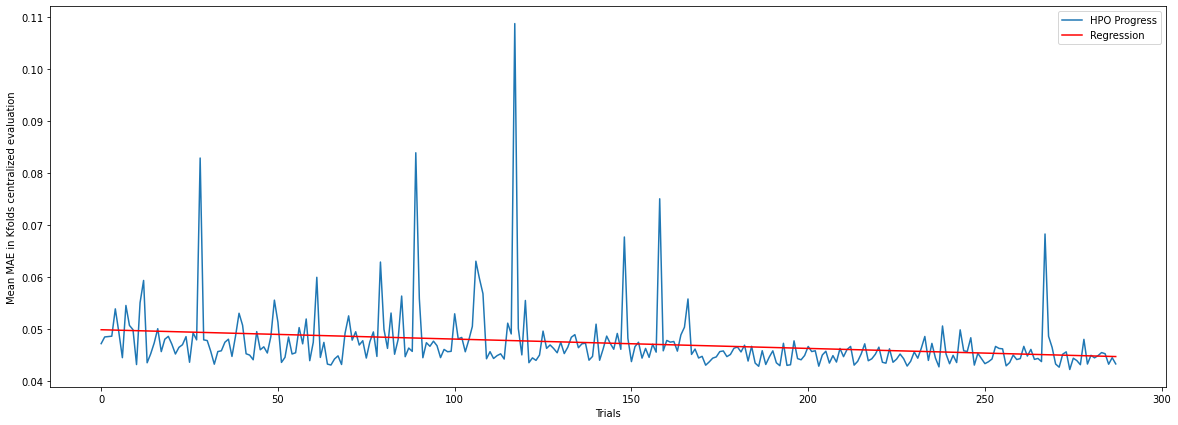

HPO Progess of model: w_bilstm
Improvement per Trial: 3.3944976280722656e-06


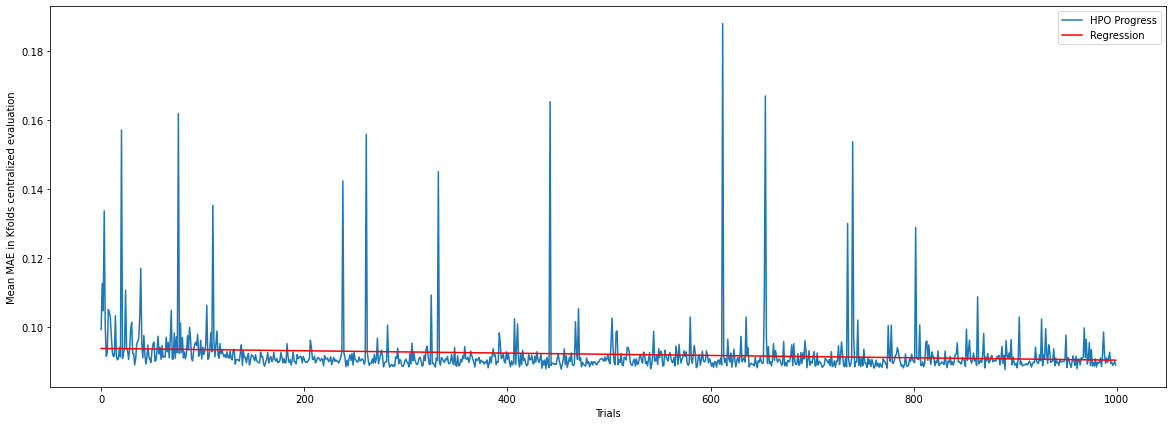

HPO Progess of model: w_tcn
Improvement per Trial: 3.5856372903024255e-06


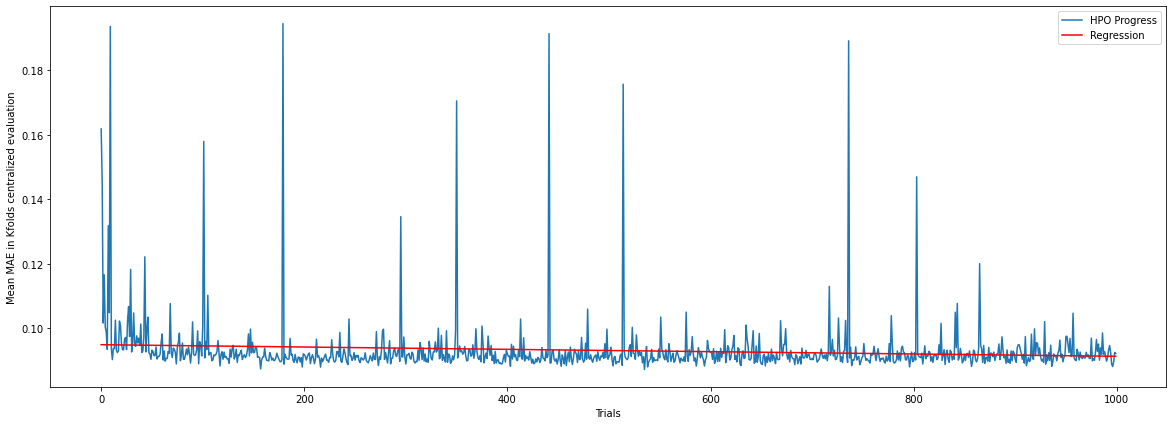

HPO Progess of model: w_xgb
Improvement per Trial: 2.576854845005593e-06


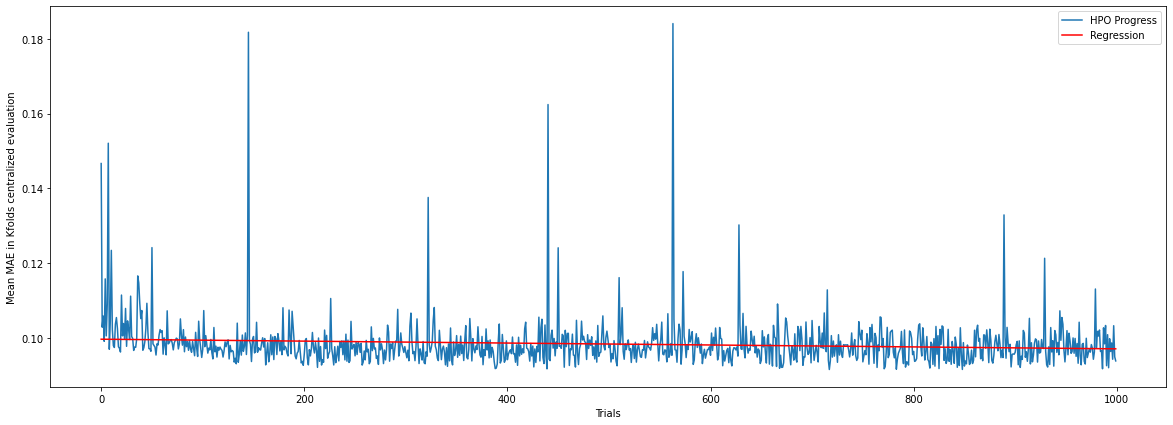

HPO Progess of model: w_lstm
Improvement per Trial: 2.8312794889216786e-06


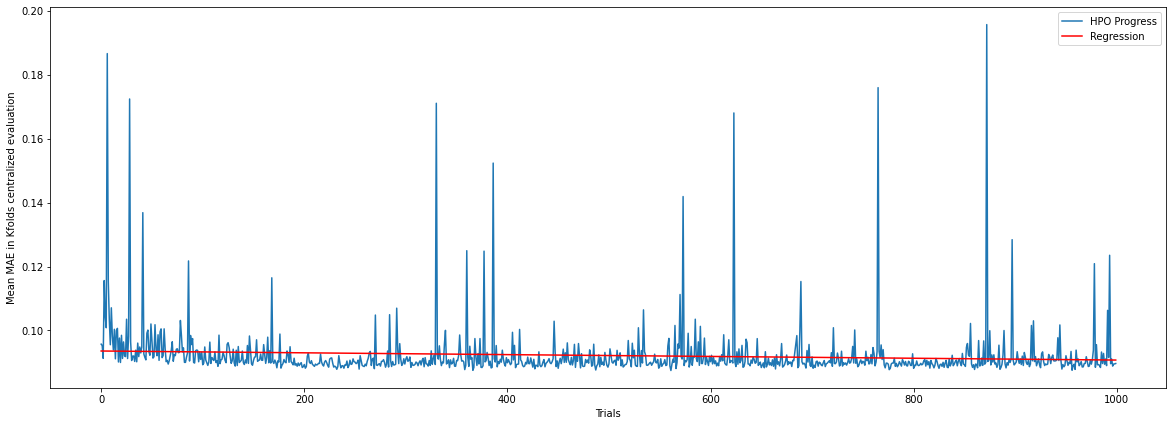

HPO Progess of model: w_cnn
Improvement per Trial: 4.889653014602828e-06


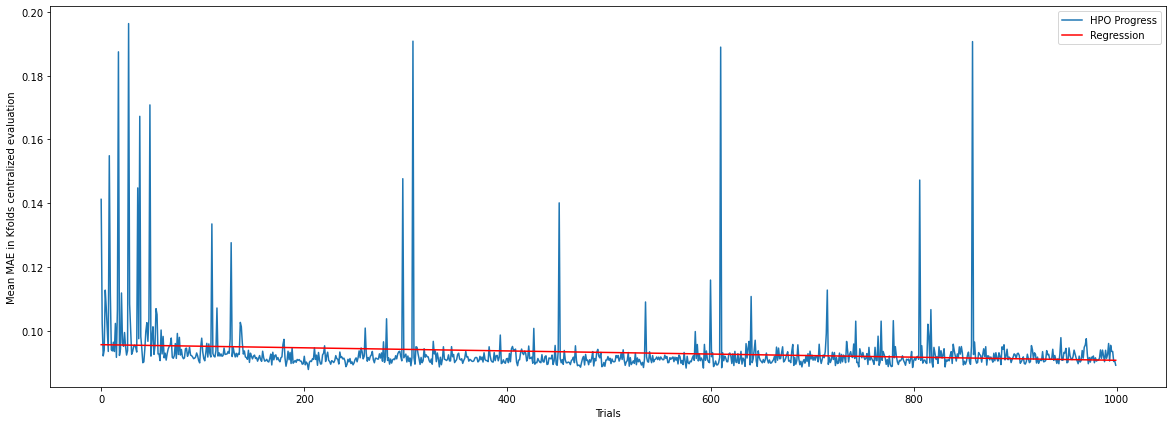

In [7]:
for model, study in enumerate(studies):
    print('HPO Progess of model:', study_names[model])
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)

    sorted_by_number = sorted(trials, key=lambda x: x.number)

    progress = [trial.values for trial in sorted_by_number]

    x = np.arange(len(progress)).reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(x, progress)

    y_pred = lr.predict(x)

    plt.figure(figsize=(20,7))

    print('Improvement per Trial:', lr.coef_[0][0]*-1)

    plt.plot(progress, label='HPO Progress')
    plt.plot(y_pred, 'r-', label='Regression')
    plt.xlabel('Trials')
    plt.ylabel('Mean MAE in Kfolds centralized evaluation')
    plt.legend()
    plt.show()